In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('indian-national-level-election.csv')
df1=pd.read_csv('indian-state-level-election.csv')
df1

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247
...,...,...,...,...,...,...,...,...,...,...,...
327289,West Bengal,2011.0,294,Murarai,GEN,Ajrail Md,M,IND,IND,2471.0,189320
327290,West Bengal,2011.0,294,Murarai,GEN,Shiblal Sardar,M,BSP,BSP,3074.0,189320
327291,West Bengal,2011.0,294,Murarai,GEN,Sudhiranjan Das Goswami,M,BJP,BJP,4961.0,189320
327292,West Bengal,2011.0,294,Murarai,GEN,Elahi Kamre Dr,M,CPM,CPM,73414.0,189320


In [2]:
df1.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [3]:
df1.tail()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
327289,West Bengal,2011.0,294,Murarai,GEN,Ajrail Md,M,IND,IND,2471.0,189320
327290,West Bengal,2011.0,294,Murarai,GEN,Shiblal Sardar,M,BSP,BSP,3074.0,189320
327291,West Bengal,2011.0,294,Murarai,GEN,Sudhiranjan Das Goswami,M,BJP,BJP,4961.0,189320
327292,West Bengal,2011.0,294,Murarai,GEN,Elahi Kamre Dr,M,CPM,CPM,73414.0,189320
327293,West Bengal,2011.0,294,Murarai,GEN,Nure Alam Chowdhury,M,AITC,AITC,77817.0,189320


In [4]:
df1.drop_duplicates(inplace=True)
df1

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247
...,...,...,...,...,...,...,...,...,...,...,...
327289,West Bengal,2011.0,294,Murarai,GEN,Ajrail Md,M,IND,IND,2471.0,189320
327290,West Bengal,2011.0,294,Murarai,GEN,Shiblal Sardar,M,BSP,BSP,3074.0,189320
327291,West Bengal,2011.0,294,Murarai,GEN,Sudhiranjan Das Goswami,M,BJP,BJP,4961.0,189320
327292,West Bengal,2011.0,294,Murarai,GEN,Elahi Kamre Dr,M,CPM,CPM,73414.0,189320


In [5]:
df1.drop(['ac_no','ac_name','partyabbre','cand_name'],axis=1,inplace=True)
df1

,st_name,year,ac_type,cand_sex,partyname,totvotpoll,electors
0,Andhra Pradesh,1978.0,GEN,M,Independent,813.0,83247
1,Andhra Pradesh,1978.0,GEN,M,Independent,1743.0,83247
2,Andhra Pradesh,1978.0,GEN,M,Indian National Congress,4427.0,83247
3,Andhra Pradesh,1978.0,GEN,M,Indian National Congress (I),19805.0,83247
4,Andhra Pradesh,1978.0,GEN,M,Janata Party,34251.0,83247
...,...,...,...,...,...,...,...
327289,West Bengal,2011.0,GEN,M,IND,2471.0,189320
327290,West Bengal,2011.0,GEN,M,BSP,3074.0,189320
327291,West Bengal,2011.0,GEN,M,BJP,4961.0,189320
327292,West Bengal,2011.0,GEN,M,CPM,73414.0,189320


In [6]:
df1.isna().sum()

st_name          0
year             0
ac_type          0
cand_sex      5302
partyname        0
totvotpoll       7
electors         0
dtype: int64

In [7]:
df1['cand_sex']=df1['cand_sex'].fillna(df1['cand_sex'].mode()[0])
df1['totvotpoll']=df1['totvotpoll'].fillna(df1['totvotpoll'].mean())
df1.isna().sum()

st_name       0
year          0
ac_type       0
cand_sex      0
partyname     0
totvotpoll    0
electors      0
dtype: int64

In [8]:
df1.dtypes

st_name        object
year          float64
ac_type        object
cand_sex       object
partyname      object
totvotpoll    float64
electors        int64
dtype: object

In [9]:
# Rename a column
df1.rename(columns={'ac_type': 'pc_type'}, inplace=True)
df1

,st_name,year,pc_type,cand_sex,partyname,totvotpoll,electors
0,Andhra Pradesh,1978.0,GEN,M,Independent,813.0,83247
1,Andhra Pradesh,1978.0,GEN,M,Independent,1743.0,83247
2,Andhra Pradesh,1978.0,GEN,M,Indian National Congress,4427.0,83247
3,Andhra Pradesh,1978.0,GEN,M,Indian National Congress (I),19805.0,83247
4,Andhra Pradesh,1978.0,GEN,M,Janata Party,34251.0,83247
...,...,...,...,...,...,...,...
327289,West Bengal,2011.0,GEN,M,IND,2471.0,189320
327290,West Bengal,2011.0,GEN,M,BSP,3074.0,189320
327291,West Bengal,2011.0,GEN,M,BJP,4961.0,189320
327292,West Bengal,2011.0,GEN,M,CPM,73414.0,189320


In [10]:
df.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [11]:
df.tail()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
73076,West Bengal,2014,42,Birbhum,GEN,None Of The Above,NaN,NOTA,NOTA,14557,1495089
73077,West Bengal,2014,42,Birbhum,GEN,Syed Siraj Jimmi,M,INC,INC,132084,1495089
73078,West Bengal,2014,42,Birbhum,GEN,Joy Banerjee,M,BJP,BJP,235753,1495089
73079,West Bengal,2014,42,Birbhum,GEN,Dr. Elahi Kamre Mahammad,M,CPM,CPM,393305,1495089
73080,West Bengal,2014,42,Birbhum,GEN,Satabdi Roy,F,AITC,AITC,460568,1495089


In [12]:
#checking the row and columns
df.shape

(73081, 11)

In [13]:
df.drop_duplicates(inplace=True)
df

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084
...,...,...,...,...,...,...,...,...,...,...,...
73076,West Bengal,2014,42,Birbhum,GEN,None Of The Above,NaN,NOTA,NOTA,14557,1495089
73077,West Bengal,2014,42,Birbhum,GEN,Syed Siraj Jimmi,M,INC,INC,132084,1495089
73078,West Bengal,2014,42,Birbhum,GEN,Joy Banerjee,M,BJP,BJP,235753,1495089
73079,West Bengal,2014,42,Birbhum,GEN,Dr. Elahi Kamre Mahammad,M,CPM,CPM,393305,1495089


In [14]:
#checking missing values
df.isna().sum()

st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex       542
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64

In [15]:
#filling missing values
df['pc_type']=df['pc_type'].fillna(df['pc_type'].mode()[0])
df['cand_sex']=df['cand_sex'].fillna(df['cand_sex'].mode()[0])
df.isna().sum()

st_name       0
year          0
pc_no         0
pc_name       0
pc_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64

In [16]:
#checking datatypes
df.dtypes

st_name       object
year           int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

In [17]:
#Dropping unwanted columns
df.drop(['pc_name','pc_no','partyabbre','cand_name'],axis=1,inplace=True)
df

,st_name,year,pc_type,cand_sex,partyname,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,GEN,M,Independents,25168,85308
1,Andaman & Nicobar Islands,1977,GEN,M,Indian National Congress,35400,85308
2,Andaman & Nicobar Islands,1980,GEN,M,Independents,109,96084
3,Andaman & Nicobar Islands,1980,GEN,M,Independents,125,96084
4,Andaman & Nicobar Islands,1980,GEN,M,Independents,405,96084
...,...,...,...,...,...,...,...
73076,West Bengal,2014,GEN,M,NOTA,14557,1495089
73077,West Bengal,2014,GEN,M,INC,132084,1495089
73078,West Bengal,2014,GEN,M,BJP,235753,1495089
73079,West Bengal,2014,GEN,M,CPM,393305,1495089


In [18]:
dfe= pd.concat([df1,df], ignore_index=True)
dfe

,st_name,year,pc_type,cand_sex,partyname,totvotpoll,electors
0,Andhra Pradesh,1978.0,GEN,M,Independent,813.0,83247
1,Andhra Pradesh,1978.0,GEN,M,Independent,1743.0,83247
2,Andhra Pradesh,1978.0,GEN,M,Indian National Congress,4427.0,83247
3,Andhra Pradesh,1978.0,GEN,M,Indian National Congress (I),19805.0,83247
4,Andhra Pradesh,1978.0,GEN,M,Janata Party,34251.0,83247
...,...,...,...,...,...,...,...
400320,West Bengal,2014.0,GEN,M,NOTA,14557.0,1495089
400321,West Bengal,2014.0,GEN,M,INC,132084.0,1495089
400322,West Bengal,2014.0,GEN,M,BJP,235753.0,1495089
400323,West Bengal,2014.0,GEN,M,CPM,393305.0,1495089


KEY MAPPING

In [19]:
#before merging the duplicates into original values
print("Unique states before cleaning:")
print("+"*50)
print(dfe['st_name'].unique())
print("+"*50)

Unique states before cleaning:
++++++++++++++++++++++++++++++++++++++++++++++++++
['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'National Capital Territory Of Delhi' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Andaman & Nicobar Islands'
 'Chandigarh' 'Chattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi'
 'Goa Daman & Diu' 'Goa, Daman & Diu' 'Lakshadweep' 'Nct Of Delhi'
 'Orissa' 'Pondicherry' 'Uttaranchal']
++++++++++++++++++++++++++++++++++++++++++++++++++


In [20]:
#after merging the duplicates into original values
dfe['st_name'] = dfe['st_name'].str.strip().str.title().replace({'Nct Of Delhi':'National Capital Territory Of Delhi'})
dfe['st_name'] = dfe['st_name'].str.strip().str.title().replace({'Goa Daman & Diu':'Goa, Daman & Diu'})
dfe['st_name'] = dfe['st_name'].str.strip().str.title().replace({'Daman & Diu':'Goa, Daman & Diu'})
dfe['st_name'] = dfe['st_name'].str.strip().str.title().replace({'Goa':'Goa, Daman & Diu'})
dfe['st_name'] = dfe['st_name'].str.strip().str.title().replace({'Chhattisgarh':'Chattisgarh'})
dfe['st_name'] = dfe['st_name'].str.strip().str.title().replace({'Pondicherry':'Puducherry'})
dfe['st_name'] = dfe['st_name'].str.strip().str.title().replace({'Uttaranchal':'Uttarakhand'})
print("Unique states after cleaning:")
print("+"*50)
print(dfe['st_name'].unique())
print("+"*50)

Unique states after cleaning:
++++++++++++++++++++++++++++++++++++++++++++++++++
['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chattisgarh'
 'Goa, Daman & Diu' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'National Capital Territory Of Delhi' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal' 'Andaman & Nicobar Islands' 'Chandigarh'
 'Dadra & Nagar Haveli' 'Delhi' 'Lakshadweep' 'Orissa']
++++++++++++++++++++++++++++++++++++++++++++++++++


In [21]:
#before merging the duplicates into original values
print('+'*100)
print('Unique partynames before cleaning:')
print(dfe['partyname'].value_counts())
print('+'*100)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique partynames before cleaning:
partyname
Independent                                        115856
Independents                                        57502
IND                                                 30799
Indian National Congress                            25767
Bharatiya Janata Party                              10444
                                                    ...  
RJAVP                                                   1
RMOP                                                    1
Indian Congress-Socialist (Sarat Chandra Sinha)         1
ABHKP                                                   1
Bharat Desham Congress                                  1
Name: count, Length: 2255, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [22]:
replacements = {'Independent': 'Independents',
                'Ind': 'Independents',
                'Inc': 'Indian National Congress',
                'Bjp': 'Bharatiya Janata Party',
                'Janata Party': 'Bharatiya Janata Party',
                'Janta Party': 'Bharatiya Janata Party',
                'Janata Pary (Jp)': 'Bharatiya Janata Party',
                'Bharatiya Janta Party': 'Bharatiya Janata Party',
                'Jp':'Bharatiya Janata Party',
                'Janta Party (Secular)':'Bharatiya Janata Party',
                'Janata Party (Secular) - Ch. Charan Singh':'Bharatiya Janata Party',
                'Bharat Jan Party':'Bharatiya Janata Party',
                'Bhartiya Janta Party':'Bharatiya Janata Party',
                'Janata Party (Jp)':'Bharatiya Janata Party',
                'Bhartiya Janata Party':'Bharatiya Janata Party',
                'Janata Party (Secular) Raj Narain':'Bharatiya Janata Party',
                'Ncp': 'Nationalist Congress Party',
                'Cpi(Ml)(L)': 'Communist Party Of India (Marxist)',
                'Communist Party Of India (Marxist-Lenninist) (Liberation)':'Communist Party Of India (Marxist)',
                'Communist Party Of India (Marxist-Lenninist)(Liberation)':'Communist Party Of India (Marxist)',
                'Communist Party Of India (Marxist-Lenninist)(Liberation)':'Communist Party Of India (Marxist)',
                'Communist Party Of India (Marxist-Leninist)':'Communist Party Of India (Marxist)',
                'Communist Party Of India (Marxist-Leninist) (Liberation)':'Communist Party Of India (Marxist)',
                'Marxist Communist Partyof India (Srivastava)':'Communist Party Of India (Marxist)',
                'Marxist Communist Party Of India (S.S. Srivastava)':'Communist Party Of India (Marxist)',
                'Marxist Communist Party Of India (S.S.Srivastava)':'Communist Party Of India (Marxist)',
                'Communist Party Of India (Marxist - Leninist)':'Communist Party Of India (Marxist)',
                'Cpim':'Communist Party Of India (Marxist)',
                'Communist Party Of India (Marxist-Lenninist)':'Communist Party Of India (Marxist)',
                'Communist Party Of India(Marxist-Leninist)(Liberation)':'Communist Party Of India (Marxist)',
                'Communist Party Of India(Marxist-Leninist)':'Communist Party Of India (Marxist)',
                'Communist Marxist Party Of India':'Communist Party Of India (Marxist)',
                'Communist Party Of India (Marxist-Lennist)(Liberation)':'Communist Party Of India (Marxist)',
                'Marxist Communist Party Of India':'Communist Party Of India (Marxist)',
                'Cpi':'Communist Party Of India',
                'Communist Marxist Party Kerala State Committee ':'Cpm',
                'Communist Marxist Party Kerala State Committee ':'Cpm',
                'Communist Marxist Party(Kerela State Committee)':'Cpm',
                'United Communist Party Of India':'Communist Party Of India',
                'Bsp': 'Bahujan Samaj Party',
                'Telugu Desam': 'Telugu Desam Party',
                'Aaap':'AAP',
                'Sp':'Samajwadi Party',
                'Jd(U)':'Janata Dal (United)',
                'Bharatiya Natiional Janta Dal':'Janata Dal (United)',
                'Rashtriya Janata Dal':'Janata Dal (United)',
                'Janata Dal':'Janata Dal (United)',
                'Janta Dal':'Janata Dal (United)',
                'Jd(S)':'Janata Dal (Secular)',
                'Janata Dal (Gujrat)':'Janata Dal (Secular)',
                'Janta Dal (Pragatisheel)':'Janata Dal (Secular)',
                'Rjd':'Rashtriya Janata Dal',
                'Aitc':'All India Trinamool Congress',
                'Aifb':'All India Forward Bloc',
                'All India Forward Block':'All India Forward Bloc',
                'All India Forward Bloc (Subhasist)':'All India Forward Bloc',
                'Forward Bloc (Socialist)':'All India Forward Bloc',
                'All India Forward Block (Marxist)':'All India Forward Bloc',
                'Sjp(R)':'Samajwadi Party',
                'Rastriya Samajwadi Party (Secular)':'Samajwadi Party',
                'Rashtriya Samajwadi Party (United)':'Samajwadi Party',
                'Rashtriya Samajwadi Party Pragatisheel':'Samajwadi Party',
                'Samajwadi Party (M)':'Samajwadi Party',
                'Bahujan Samaj Party (Raj Bahadur)':'Bahujan Samaj Party',
                'Indian Bahujan Smajwadi Party':'Bahujan Samaj Party',
                'Samajwadi Janata Party (Rashtriya)':'Samajwadi Party',
                'Bahujan Samaj Party (Ambedkar)':'Bahujan Samaj Party',
                'Indian Bahujan Samajwadi Party':'Bahujan Samaj Party',
                'All India Bahujan Samman Party ':'Bahujan Samaj Party',
                'Indian Natioanl Congress (I)':'Indian National Congress',
                'Indian National Congress (Org)':'Indian National Congress',
                'Indian National Congress (I)':'Indian National Congress',
                'Indian National Congress (U)':'Indian National Congress',
                'Indian National Congress (O) Anti-Merger Group':'Indian National Congress',
                'Telugu Desam Party':'Telugu Desam Party',
                'Shiromani Akali Dal (Simranjit Singh Mann)':'Shiromani Akali Dal',
                'Shiromani Akali Dal (Badal)':'Shiromani Akali Dal',
                'Shiromani Akali Dal (Simaranjit Singh Mann)':'Shiromani Akali Dal',
                'Shiromani Akali Dal (Amritsar)(Simranjit Singh Mann)':'Shiromani Akali Dal',
                'Dmk':'Dravida Munnetra Kazhagam',
                'National Panthers Party':'Jammu & Kashmir National Panthers Party',
                'Jammu & Kashmir Panthers Party':'Jammu & Kashmir National Panthers Party',
                'J & K National Panthers Party':'Jammu & Kashmir National Panthers Party',
                'Jammu-Kashmir Panthers Party':'Jammu & Kashmir National Panthers Party',
                'Shs':'Shiv Sena',
                'Shivsena':'Shiv Sena',
                'Ljsp':'Lok Jan Shakti Party',
                'Doordasthi Party':'Doordarshi Party',
                'Muslim League':'Indian Union Muslim League',
                'All India Muslim League':'Indian Union Muslim League',
                'All India Muslim Forum':'Indian Union Muslim League',
                'Bjd':'Biju Janata Dal',
                'All India Anna Dravida Munnetra Kazhagam(Jayalalita Group)':'All India Anna Dravida Munnetra Kazhagam',
                'All India Anna Dravida Munnetra Kazhagam(Janaki Ramachandran':'All India Anna Dravida Munnetra Kazhagam',
                'Aap':'AAP',
                'App':'AAP'
                }

dfe['partyname'] = dfe['partyname'].str.strip().str.title().replace(replacements)
values=dfe['partyname'].value_counts().to_string()
print(values)

partyname
Independents                                               204157
Indian National Congress                                    36978
Bharatiya Janata Party                                      35475
Bahujan Samaj Party                                         15854
Janata Dal (United)                                          8449
Samajwadi Party                                              6656
Communist Party Of India (Marxist)                           6020
Communist Party Of India                                     4682
Doordarshi Party                                             4015
Nationalist Congress Party                                   3119
Shiv Sena                                                    3027
Nota                                                         2322
All India Anna Dravida Munnetra Kazhagam                     1817
Lok Dal                                                      1804
Dravida Munnetra Kazhagam                                    1748


In [23]:
partyname = ['Independents',
             'Telugu Desam Party',
             'Communist Party Of India (Marxist-Leninist) (Liberation)',
             'Janata Dal (United)',
             'Communist Party Of India (Marxist)',
             'Shiromani Akali Dal',
             'Indian National Congress',
             'Indian Union Muslim League',
             'Bharatiya Janata Party',
             'Bahujan Samaj Party',
             'Communist Party Of India',
             'Nationalist Congress Party',
             'All India Trinamool Congress',
             'Samajwadi Party',
             'All India Anna Dravida Munnetra Kazhagam',
             'Dravida Munnetra Kazhagam',
             'Shiv Sena',
             'Janata Dal (Secular)',
             'Rashtriya Janata Dal',
             'Biju Janata Dal',
             'AAP',
             'Nota',
             'Indian National Lok Dal',
             'Jammu & Kashmir National Panthers Party']

In [24]:
dfe['partyname'] = dfe['partyname'].apply(lambda x: x if x in partyname else 'Others')
dfe

,st_name,year,pc_type,cand_sex,partyname,totvotpoll,electors
0,Andhra Pradesh,1978.0,GEN,M,Independents,813.0,83247
1,Andhra Pradesh,1978.0,GEN,M,Independents,1743.0,83247
2,Andhra Pradesh,1978.0,GEN,M,Indian National Congress,4427.0,83247
3,Andhra Pradesh,1978.0,GEN,M,Indian National Congress,19805.0,83247
4,Andhra Pradesh,1978.0,GEN,M,Bharatiya Janata Party,34251.0,83247
...,...,...,...,...,...,...,...
400320,West Bengal,2014.0,GEN,M,Nota,14557.0,1495089
400321,West Bengal,2014.0,GEN,M,Indian National Congress,132084.0,1495089
400322,West Bengal,2014.0,GEN,M,Bharatiya Janata Party,235753.0,1495089
400323,West Bengal,2014.0,GEN,M,Others,393305.0,1495089


In [25]:
print("Unique partynames after cleaning:")
count=dfe['partyname'].value_counts().to_string()
print(count)

Unique partynames after cleaning:
partyname
Independents                                204157
Others                                       61819
Indian National Congress                     36978
Bharatiya Janata Party                       35475
Bahujan Samaj Party                          15854
Janata Dal (United)                           8449
Samajwadi Party                               6656
Communist Party Of India (Marxist)            6020
Communist Party Of India                      4682
Nationalist Congress Party                    3119
Shiv Sena                                     3027
Nota                                          2322
All India Anna Dravida Munnetra Kazhagam      1817
Dravida Munnetra Kazhagam                     1748
Janata Dal (Secular)                          1605
Telugu Desam Party                            1517
All India Trinamool Congress                  1515
Shiromani Akali Dal                            838
AAP                                   

In [26]:
dfe['st_name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chattisgarh', 'Goa, Daman & Diu', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'National Capital Territory Of Delhi',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Andaman & Nicobar Islands', 'Chandigarh',
       'Dadra & Nagar Haveli', 'Delhi', 'Lakshadweep', 'Orissa'],
      dtype=object)

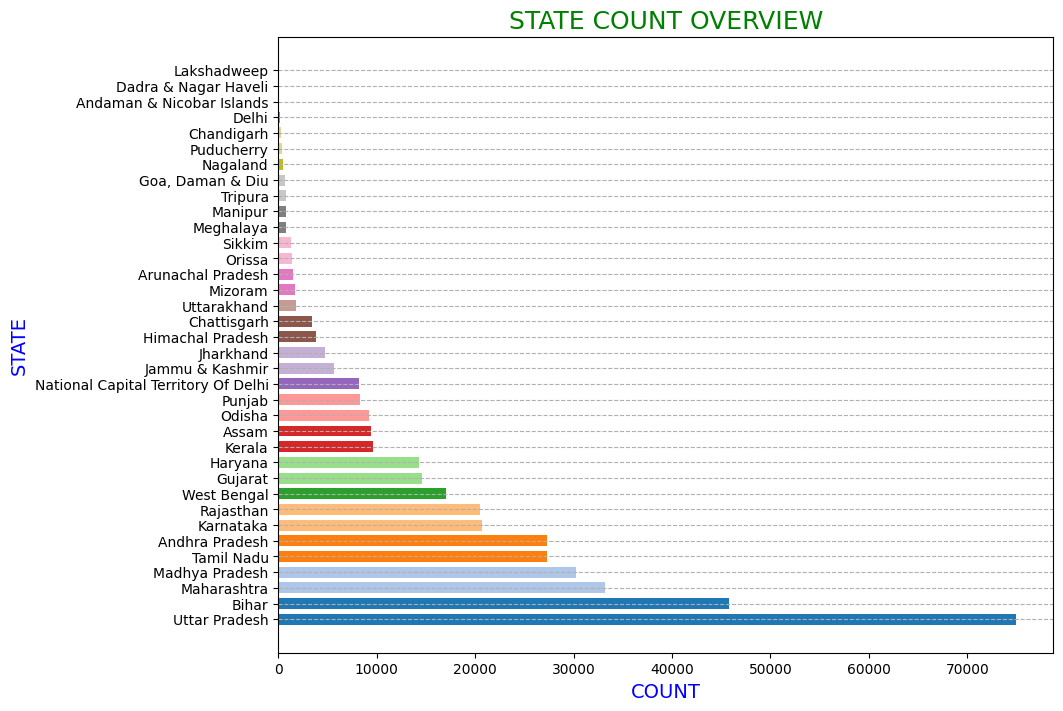

In [27]:
y=dfe['st_name'].value_counts()
x=y.index
colors=plt.cm.tab20(np.linspace(0,1,len(y)))
plt.figure(figsize=(10,8))
plt.barh(x,y,height=0.7,align='center',color=colors)
plt.xlabel('COUNT',color='b',fontsize=14)
plt.ylabel('STATE',color='b',fontsize=14)
plt.title('STATE COUNT OVERVIEW',color='g',fontsize=18)
plt.grid(axis='y',linestyle='--')

In [28]:
dfe['partyname'].unique()

array(['Independents', 'Indian National Congress',
       'Bharatiya Janata Party', 'Communist Party Of India', 'Others',
       'Communist Party Of India (Marxist)',
       'All India Anna Dravida Munnetra Kazhagam',
       'Dravida Munnetra Kazhagam', 'Telugu Desam Party',
       'Bahujan Samaj Party', 'Janata Dal (United)',
       'Indian Union Muslim League', 'Samajwadi Party', 'Shiv Sena',
       'Nationalist Congress Party', 'Janata Dal (Secular)',
       'Rashtriya Janata Dal', 'Nota', 'AAP',
       'All India Trinamool Congress',
       'Jammu & Kashmir National Panthers Party',
       'Indian National Lok Dal', 'Shiromani Akali Dal',
       'Biju Janata Dal'], dtype=object)

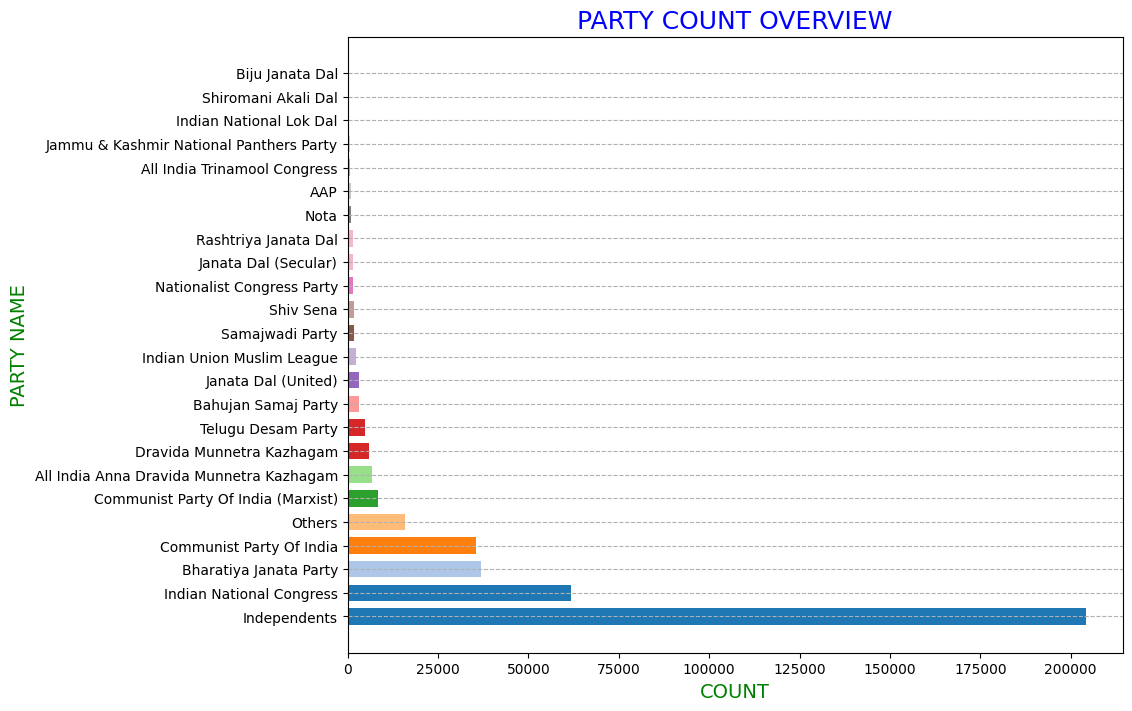

In [29]:
x=dfe['partyname'].unique()
y=dfe['partyname'].value_counts()
colors=plt.cm.tab20(np.linspace(0,1,len(y)))
plt.figure(figsize=(10,8))
plt.barh(x,y,height=0.7,align='center',color=colors)
plt.xlabel('COUNT',color='g',fontsize=14)
plt.ylabel('PARTY NAME',color='g',fontsize=14)
plt.title('PARTY COUNT OVERVIEW',color='b',fontsize=18)
plt.grid(axis='y',linestyle='--')

In [30]:
dfe['cand_sex'].value_counts()

cand_sex
M    381777
F     18531
O        17
Name: count, dtype: int64

In [31]:
dfe['cand_sex'].unique()

array(['M', 'F', 'O'], dtype=object)

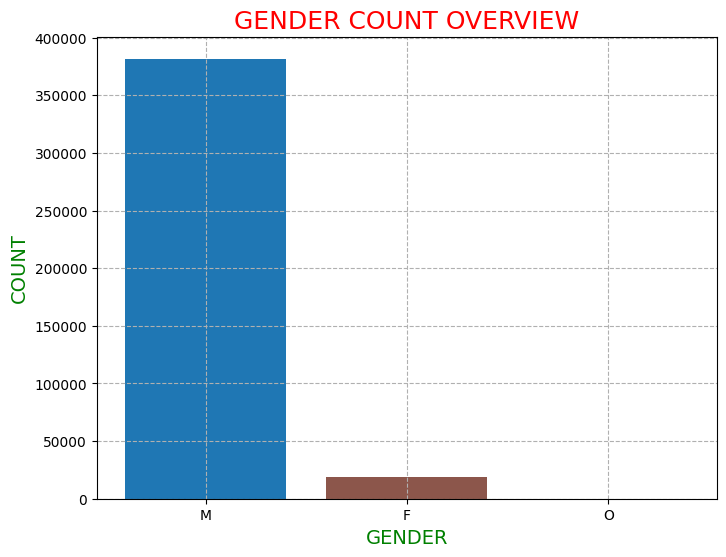

In [32]:
y=dfe['cand_sex'].value_counts()
x=dfe['cand_sex'].unique()
plt.figure(figsize=(8,6))
colors=plt.cm.tab20(np.linspace(0,1,len(y)))
plt.bar(x,y,align='center',color=colors)
plt.xlabel('GENDER',color='g',fontsize=14)
plt.ylabel('COUNT',color='g',fontsize=14)
plt.title('GENDER COUNT OVERVIEW',color='r',fontsize=18)
plt.grid(linestyle='--')

In [33]:
dfe['year'].unique()

array([1978. , 1983. , 1985. , 1989. , 1994. , 1999. , 2004. , 2009. ,
       2014. , 1980. , 1984. , 1990. , 1995. , 1991. , 1996. , 2001. ,
       2006. , 2011. , 1977. , 2000. , 2005. , 2005.1, 2010. , 2003. ,
       2008. , 2013. , 2007. , 2012. , 1998. , 2002. , 1982. , 1987. ,
       1993. , 1979. , 2015. , 1992. , 1997. ])

In [34]:
dfe['year'].value_counts()

year
1996.0    30959
1991.0    25680
1985.0    24622
2014.0    22916
1980.0    21351
1990.0    21123
2009.0    19609
1989.0    19330
1977.0    18065
1993.0    17735
1995.0    17267
2004.0    12785
2008.0    11966
2012.0    11324
1998.0    11216
2013.0    10976
1999.0    10370
2007.0    10040
2002.0     8165
1984.0     7240
2011.0     6679
2006.0     6168
2003.0     5948
1994.0     5902
2000.0     5774
1978.0     5700
2005.0     5566
2001.0     5128
1987.0     4745
1983.0     4469
2010.0     3523
1982.0     3440
2005.1     2135
2015.0      743
1997.0      693
1992.0      579
1979.0      394
Name: count, dtype: int64

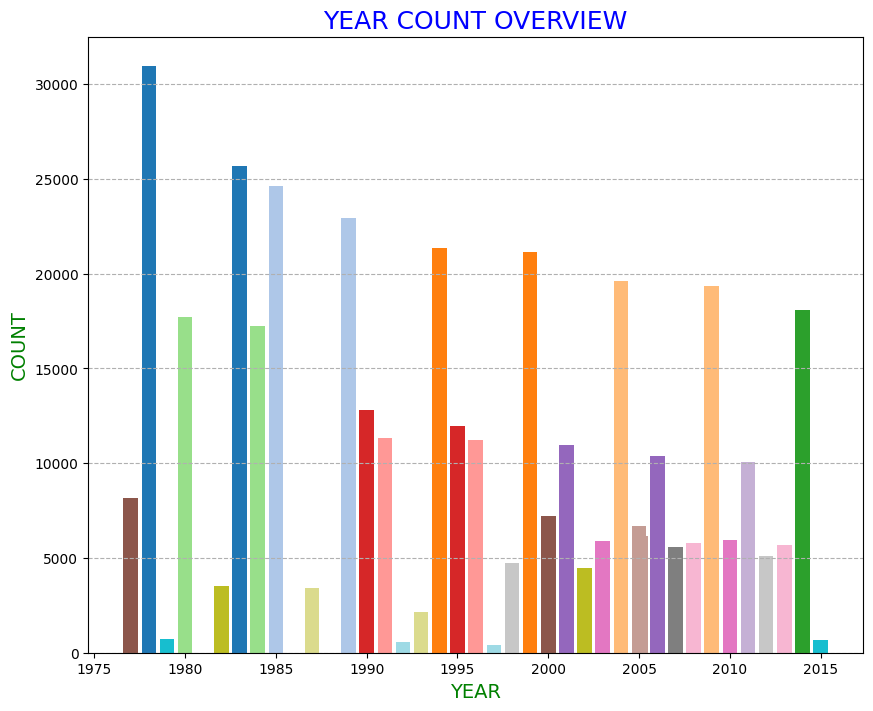

In [35]:
x=dfe['year'].unique()
y=dfe['year'].value_counts()
colors=plt.cm.tab20(np.linspace(0,1,len(y)))
plt.figure(figsize=(10,8))
plt.bar(x,y,align='center',color=colors)
plt.xlabel('YEAR',color='g',fontsize=14)
plt.ylabel('COUNT',color='g',fontsize=14)
plt.title('YEAR COUNT OVERVIEW',color='b',fontsize=18)
plt.grid(axis='y',linestyle='--')

In [36]:
dfe['pc_type'].unique()

array(['GEN', 'ST', 'SC', 'BL', 'SANGH', 'SC '], dtype=object)

In [37]:
dfe['pc_type'].value_counts()

pc_type
GEN      327694
SC        49114
ST        23466
BL           30
SC           15
SANGH         6
Name: count, dtype: int64

In [38]:
category={'GEN','SC','ST'}

In [39]:
dfe['pc_type'] = dfe['pc_type'].apply(lambda x: x if x in category else 'Others')
dfe['pc_type'].unique()

array(['GEN', 'ST', 'SC', 'Others'], dtype=object)

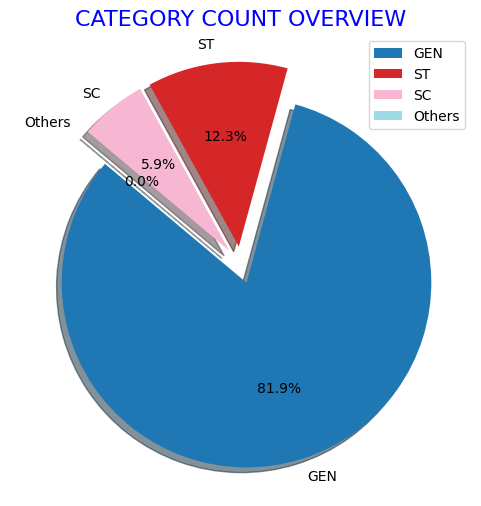

In [40]:
x=dfe['pc_type'].unique()
y=dfe['pc_type'].value_counts()
explode = [0.1] * len(x)
colors=plt.cm.tab20(np.linspace(0,1,len(y)))
plt.figure(figsize=(11,6))
plt.pie(y,labels=x,autopct='%1.1f%%',colors=colors,shadow=True,explode=explode, startangle=140)
plt.title('CATEGORY COUNT OVERVIEW', fontsize=16,color='b')
plt.legend()

In [41]:
dfe.dtypes

st_name        object
year          float64
pc_type        object
cand_sex       object
partyname      object
totvotpoll    float64
electors        int64
dtype: object

In [42]:
from sklearn.preprocessing import LabelEncoder
lb_st_name = LabelEncoder()
lb_st_name.fit(dfe['st_name'])
lb_cand_sex = LabelEncoder()
lb_cand_sex.fit(dfe['cand_sex'])
lb_pc_type = LabelEncoder()
lb_pc_type.fit(dfe['pc_type'])
lb_partyname = LabelEncoder()
lb_partyname.fit(dfe['partyname'])
dfe.dtypes

st_name        object
year          float64
pc_type        object
cand_sex       object
partyname      object
totvotpoll    float64
electors        int64
dtype: object

In [43]:
dfe['st_name'] = lb_st_name.transform(dfe['st_name'])
dfe['cand_sex'] = lb_cand_sex.transform(dfe['cand_sex'])
dfe['pc_type'] = lb_pc_type.transform(dfe['pc_type'])
dfe['partyname'] = lb_partyname.transform(dfe['partyname'])

In [44]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400325 entries, 0 to 400324
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     400325 non-null  int32  
 1   year        400325 non-null  float64
 2   pc_type     400325 non-null  int32  
 3   cand_sex    400325 non-null  int32  
 4   partyname   400325 non-null  int32  
 5   totvotpoll  400325 non-null  float64
 6   electors    400325 non-null  int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 15.3 MB


<Axes: >

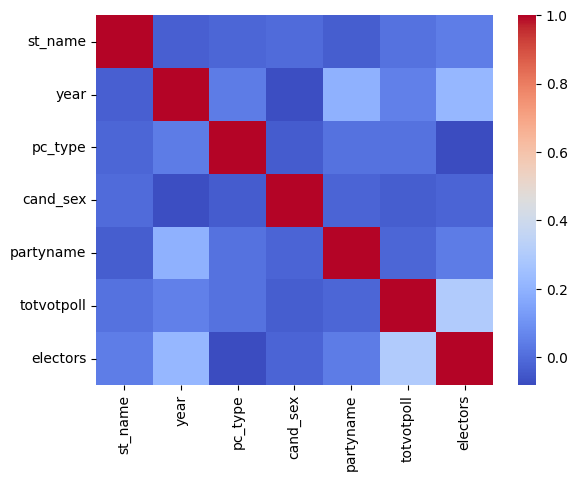

In [45]:
sns.heatmap(dfe.corr(numeric_only=True),cmap='coolwarm')

In [46]:
from scipy import stats
z_scores= np.abs(stats.zscore(dfe))
outliers=(z_scores>3).any(axis=1)
df_outliers=dfe[outliers]
print(f'number of outliers: {df_outliers.shape[0]}')


number of outliers: 33613


In [47]:
def replace_outliers_with_nan(dfe, column):
    Q1 = dfe[column].quantile(0.25)
    Q3 = dfe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    dfe[column] = dfe[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
    return dfe


In [48]:
dfe = replace_outliers_with_nan(dfe, 'partyname')
dfe = replace_outliers_with_nan(dfe, 'electors')
dfe = replace_outliers_with_nan(dfe, 'st_name')
dfe = replace_outliers_with_nan(dfe, 'year')
dfe = replace_outliers_with_nan(dfe, 'pc_type')
dfe = replace_outliers_with_nan(dfe, 'cand_sex')
dfe = replace_outliers_with_nan(dfe, 'partyname')
dfe.isna().sum()

st_name            0
year               0
pc_type        72631
cand_sex       18548
partyname     196168
totvotpoll         0
electors       73135
dtype: int64

In [49]:
dfe['pc_type']=dfe['pc_type'].fillna(dfe['pc_type'].mode()[0])
dfe['cand_sex']=dfe['cand_sex'].fillna(dfe['cand_sex'].mode()[0])
dfe['partyname']=dfe['partyname'].fillna(dfe['partyname'].mode()[0])
dfe['electors']=dfe['electors'].fillna(dfe['electors'].mode()[0])
dfe.isna().sum()

st_name       0
year          0
pc_type       0
cand_sex      0
partyname     0
totvotpoll    0
electors      0
dtype: int64

In [50]:
dfe.describe

<bound method NDFrame.describe of         st_name    year  pc_type  cand_sex  partyname  totvotpoll  electors
0             1  1978.0      0.0       1.0        9.0       813.0   83247.0
1             1  1978.0      0.0       1.0        9.0      1743.0   83247.0
2             1  1978.0      0.0       1.0        9.0      4427.0   83247.0
3             1  1978.0      0.0       1.0        9.0     19805.0   83247.0
4             1  1978.0      0.0       1.0        9.0     34251.0   83247.0
...         ...     ...      ...       ...        ...         ...       ...
400320       35  2014.0      0.0       1.0        9.0     14557.0  194579.0
400321       35  2014.0      0.0       1.0        9.0    132084.0  194579.0
400322       35  2014.0      0.0       1.0        9.0    235753.0  194579.0
400323       35  2014.0      0.0       1.0        9.0    393305.0  194579.0
400324       35  2014.0      0.0       1.0        9.0    460568.0  194579.0

[400325 rows x 7 columns]>

In [51]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# Generate sample data
X,y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [53]:
# Initialize the model
rfr = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [54]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [55]:

# Evaluate the model with the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 22.7323333773304
MSE: 807.5943305179483
RMSE: 28.418204209941702
R2 Score: 0.868835049529846


In [56]:
df2=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'difference':y_test-y_pred})
df2

,actual value,predicted value,difference
0,-47.615985,-7.752375,-39.863610
1,6.519054,23.526410,-17.007355
2,111.176996,104.191327,6.985669
3,-65.354232,-27.765643,-37.588589
4,-106.607374,-109.091455,2.484082
5,102.814989,79.960166,22.854823
6,-81.901313,-75.810637,-6.090676
7,51.801105,77.729930,-25.928825
8,-16.559427,-55.218868,38.659441
9,-8.921055,37.293271,-46.214325


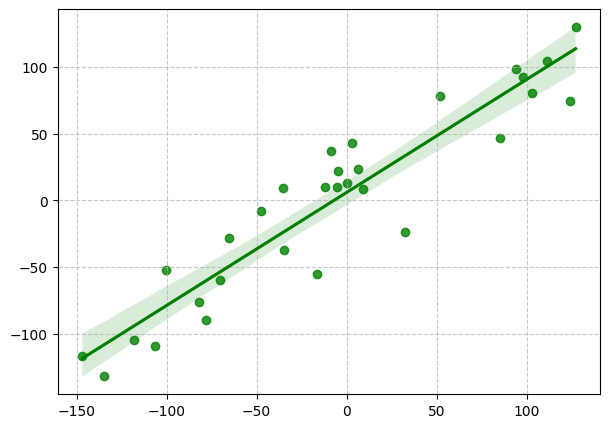

In [57]:
plt.figure(figsize=(7,5))
sns.regplot(x=y_test,y=y_pred,data=dfe,color='g')
plt.grid(linestyle='--', alpha=0.7)

In [58]:
import joblib
joblib.dump(grid_search,'gridsearch.pkl')
joblib.dump(lb_st_name, 'lb_st_name.pkl')
joblib.dump(lb_pc_type, 'lb_pc_type.pkl')
joblib.dump(lb_partyname, 'lb_partyname.pkl')
joblib.dump(lb_cand_sex, 'lb_cand_sex.pkl')


['lb_cand_sex.pkl']